In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, ZeroPadding2D
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Concatenate, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers, activations
import os
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator


TRAINING_DIR = r"C:\Users\srika\Dropbox\PC\Downloads\Final Dataset of Telugu Handwritten Chararcters\Final Dataset of Telugu Handwritten Chararcters\Test1\alpha"
batch_size = 256

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255,
    # shear_range=0.2,
    # zoom_range=0.2,
    horizontal_flip=False,
    validation_split=0.20) # set validation split

train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(50,50),
    color_mode='grayscale',
	class_mode='categorical',
    batch_size = batch_size,
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    TRAINING_DIR, # same directory as training data
    target_size=(50,50),
    color_mode='grayscale',
	class_mode='categorical',
    batch_size = batch_size,
    subset='validation') # set as validation data

Found 23339 images belonging to 52 classes.
Found 5805 images belonging to 52 classes.


In [9]:
class AKHCRNetV1():
    
    def make_model(self):
        
        input_shape = self.input_shape
        input_layer = Input(input_shape)
        conv2D_1 = Conv2D(50, (5, 5), activation='relu', padding='same', name='conv2D_1')(input_layer)
        conv2D_2 = Conv2D(50, (5, 5), padding='same', name='conv2D_2')(conv2D_1)
        batchnorm_1 = BatchNormalization(name='first_batchNorm_layer')(conv2D_2)
        activation1 = Activation('relu')(batchnorm_1)
        
        maxpool_1 = MaxPooling2D(pool_size=(2,2))(batchnorm_1)
        
        first_branch_0_conv2D_1 = Conv2D(128, (1, 1), activation='relu', padding='same', name='first_branch_0_conv2D_1')(maxpool_1)
        first_branch_0_conv2D_2 = Conv2D(128, (5, 5), activation='relu', padding='same', name='first_branch_0_conv2D_2')(first_branch_0_conv2D_1)
        
        first_branch_1_conv2D_1 = Conv2D(128, (1, 1),activation='relu',padding='same', name='first_branch_1_conv2D_1')(maxpool_1)
        first_branch_1_conv2D_2 = Conv2D(128, (3, 3),activation='relu',padding='same', name='first_branch_1_conv2D_2')(first_branch_1_conv2D_1)
        
        first_branch_2_conv2D = Conv2D(128, (1, 1),activation='relu',padding='same', name='first_branch_2_conv2D')(maxpool_1)
        
        first_branch_3_MaxPool_1 = MaxPooling2D((3,3), strides=(1,1), padding='same', name='first_branch_3_MaxPool_1')(maxpool_1)
        first_branch_3_Convolution = Conv2D(64, (1,1), padding='same', activation='relu', name='first_branch_3_Convolution')(first_branch_3_MaxPool_1)
                
        concatened_first_branch = Concatenate()([first_branch_0_conv2D_2, first_branch_1_conv2D_2, first_branch_2_conv2D, first_branch_3_Convolution])
        concatenation_activation = Activation('relu')(concatened_first_branch)

        conv2D_3 = Conv2D(256, (3, 3), activation='relu', padding='same', name='conv2D_3')(concatenation_activation)
        maxpool_2 = MaxPooling2D(pool_size=(2,2))(conv2D_3)
        conv2D_4 = Conv2D(256, (3, 3), padding='same', name='conv2D_4')(maxpool_2)
        batchnorm_2 = BatchNormalization(name='second_batchNorm_layer')(conv2D_4)
        activation2 = Activation('relu')(batchnorm_2)

        conv2D_5 = Conv2D(512, (3, 3), activation='relu', padding='same', name='conv2D_5')(activation2)
        maxpool_3 = MaxPooling2D(pool_size=(2,2))(conv2D_5)
        conv2D_6 = Conv2D(512, (3, 3), padding='same', name='conv2D_6')(maxpool_3)
        batchnorm_3 = BatchNormalization(name='third_batchNorm_layer')(conv2D_6)
        activation3 = Activation('relu')(batchnorm_3)
        maxpool_4 = MaxPooling2D(pool_size=(2,2))(activation3)
        
        flattened_before_dense = Flatten()(maxpool_4)
        dense1 = Dense(1024, activation='relu', name='firstDenseLayer', kernel_regularizer= keras.regularizers.l2(0.001))(flattened_before_dense)
        dense2 = Dense(512, activation='relu', name='SecondDenseLayer', kernel_regularizer= keras.regularizers.l2(0.001))(dense1)
        dropout1 = Dropout(0.5, name='FirstDropOutLayer')(dense2)
        dense3 = Dense(256, activation='relu', name='ThirdDenseLayer', kernel_regularizer= keras.regularizers.l2(0.001))(dropout1)
        
        dense4 = Dense(128, activation='relu', name='FourthDenseLayer')(dense3)

        prediction_branch = Dense(self.output,activation='softmax', name='FinalSoftmaxLayer')(dense4)

        model = Model(inputs=input_layer, outputs=prediction_branch)
        
        
        return model
    
    def show_graph(self):
        return model.summary()
    
    def __init__(self, input_shape, output):
        self.input_shape = input_shape
        self.output = output

In [5]:
architecture = AKHCRNetV1(input_shape= (50, 50, 1), output=52)

In [6]:
model = architecture.make_model()

In [7]:
architecture.show_graph()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 50, 50, 1)]  0           []                               
                                                                                                  
 conv2D_1 (Conv2D)              (None, 50, 50, 50)   1300        ['input_1[0][0]']                
                                                                                                  
 conv2D_2 (Conv2D)              (None, 50, 50, 50)   62550       ['conv2D_1[0][0]']               
                                                                                                  
 first_batchNorm_layer (BatchNo  (None, 50, 50, 50)  200         ['conv2D_2[0][0]']               
 rmalization)                                                                                 

In [8]:
learning_rate = 0.001
epochs = 20
batch_size = 256

In [9]:
model.compile(loss='categorical_crossentropy', 
                metrics=['accuracy'],
                optimizer=Adam(learning_rate=0.001))

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 50, 50, 1)]  0           []                               
                                                                                                  
 conv2D_1 (Conv2D)              (None, 50, 50, 50)   1300        ['input_1[0][0]']                
                                                                                                  
 conv2D_2 (Conv2D)              (None, 50, 50, 50)   62550       ['conv2D_1[0][0]']               
                                                                                                  
 first_batchNorm_layer (BatchNo  (None, 50, 50, 50)  200         ['conv2D_2[0][0]']               
 rmalization)                                                                                 

In [10]:
len(model.layers)

32

In [12]:
filepath = "modeltelugu2.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [13]:
history = model.fit(train_generator,
                    epochs=20,
                    steps_per_epoch = train_generator.samples // batch_size,
                    validation_data = validation_generator, 
                    validation_steps = validation_generator.samples // batch_size, callbacks=callbacks_list)

Epoch 1/20
91/91 [==============================] - ETA: 0s - loss: 5.6345 - accuracy: 0.0204
Epoch 1: val_loss improved from inf to 4.94638, saving model to modeltelugu2.h5
91/91 [==============================] - 36s 265ms/step - loss: 5.6345 - accuracy: 0.0204 - val_loss: 4.9464 - val_accuracy: 0.0201
Epoch 2/20
91/91 [==============================] - ETA: 0s - loss: 4.6689 - accuracy: 0.0303
Epoch 2: val_loss improved from 4.94638 to 4.46205, saving model to modeltelugu2.h5
91/91 [==============================] - 22s 241ms/step - loss: 4.6689 - accuracy: 0.0303 - val_loss: 4.4620 - val_accuracy: 0.0312
Epoch 3/20
91/91 [==============================] - ETA: 0s - loss: 4.3351 - accuracy: 0.0317
Epoch 3: val_loss improved from 4.46205 to 4.24454, saving model to modeltelugu2.h5
91/91 [==============================] - 22s 243ms/step - loss: 4.3351 - accuracy: 0.0317 - val_loss: 4.2445 - val_accuracy: 0.0330
Epoch 4/20
91/91 [==============================] - ETA: 0s - loss: 4.0740

In [14]:
from keras import backend as K
print(model.optimizer.learning_rate)

<tf.Variable 'Adam/learning_rate:0' shape=() dtype=float32, numpy=0.001>


In [15]:
new_model = tf.keras.models.load_model(filepath)
K.set_value(new_model.optimizer.learning_rate, 0.0001)

history = new_model.fit(train_generator,
                    epochs=10,
                    steps_per_epoch = train_generator.samples // batch_size,
                    validation_data = validation_generator,
                    validation_steps = validation_generator.samples // batch_size, callbacks=callbacks_list)

Epoch 1/10
91/91 [==============================] - ETA: 0s - loss: 0.1920 - accuracy: 0.9839
Epoch 1: val_loss improved from 0.45048 to 0.31295, saving model to modeltelugu2.h5
91/91 [==============================] - 28s 299ms/step - loss: 0.1920 - accuracy: 0.9839 - val_loss: 0.3130 - val_accuracy: 0.9490
Epoch 2/10
91/91 [==============================] - ETA: 0s - loss: 0.1682 - accuracy: 0.9914
Epoch 2: val_loss improved from 0.31295 to 0.27238, saving model to modeltelugu2.h5
91/91 [==============================] - 28s 308ms/step - loss: 0.1682 - accuracy: 0.9914 - val_loss: 0.2724 - val_accuracy: 0.9624
Epoch 3/10
91/91 [==============================] - ETA: 0s - loss: 0.1592 - accuracy: 0.9941
Epoch 3: val_loss improved from 0.27238 to 0.26854, saving model to modeltelugu2.h5
91/91 [==============================] - 28s 309ms/step - loss: 0.1592 - accuracy: 0.9941 - val_loss: 0.2685 - val_accuracy: 0.9616
Epoch 4/10
91/91 [==============================] - ETA: 0s - loss: 0.

In [16]:
new_model2 = tf.keras.models.load_model(filepath)
print(new_model2.optimizer.learning_rate)

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1e-04>


In [17]:
from keras import backend as K
K.set_value(new_model2.optimizer.learning_rate, 0.00004)
print(new_model2.optimizer.learning_rate)

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=4e-05>


In [18]:
history = new_model2.fit(train_generator,
                    epochs=5,
                    steps_per_epoch = train_generator.samples // batch_size,
                    validation_data = validation_generator,
                    validation_steps = validation_generator.samples // batch_size, callbacks=callbacks_list)

Epoch 1/5
91/91 [==============================] - ETA: 0s - loss: 0.1366 - accuracy: 0.9973
Epoch 1: val_loss did not improve from 0.26098
91/91 [==============================] - 28s 304ms/step - loss: 0.1366 - accuracy: 0.9973 - val_loss: 0.2652 - val_accuracy: 0.9648
Epoch 2/5
91/91 [==============================] - ETA: 0s - loss: 0.1347 - accuracy: 0.9977
Epoch 2: val_loss did not improve from 0.26098
91/91 [==============================] - 27s 300ms/step - loss: 0.1347 - accuracy: 0.9977 - val_loss: 0.2655 - val_accuracy: 0.9647
Epoch 3/5
91/91 [==============================] - ETA: 0s - loss: 0.1331 - accuracy: 0.9977
Epoch 3: val_loss improved from 0.26098 to 0.25942, saving model to modeltelugu2.h5
91/91 [==============================] - 28s 303ms/step - loss: 0.1331 - accuracy: 0.9977 - val_loss: 0.2594 - val_accuracy: 0.9641
Epoch 4/5
91/91 [==============================] - ETA: 0s - loss: 0.1317 - accuracy: 0.9982
Epoch 4: val_loss did not improve from 0.25942
91/91 [

In [19]:
new_model3 = tf.keras.models.load_model(filepath)
print(new_model3.optimizer.learning_rate)

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=4e-05>


In [57]:
!ls

adc.json		   AKHCRNetV2.png  model.h5
akhcrnetv1dataprivate.zip  Images	   sample_data


In [ ]:
import h5py

In [3]:
model_path = r"C:\Users\srika\OneDrive\Desktop\New folder\namra\modeltelugu.h5"
loaded_model = tf.keras.models.load_model(model_path)

# Make sure to compile the loaded model before using it for predictions or training
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [4]:
import tensorflow as tf

# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)
tflite_model = converter.convert()

# Save the model.
with open('modeltelugu2.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\srika\AppData\Local\Temp\tmpuyw2imwo\assets


INFO:tensorflow:Assets written to: C:\Users\srika\AppData\Local\Temp\tmpuyw2imwo\assets


23/23 [==============================] - 2s 98ms/step


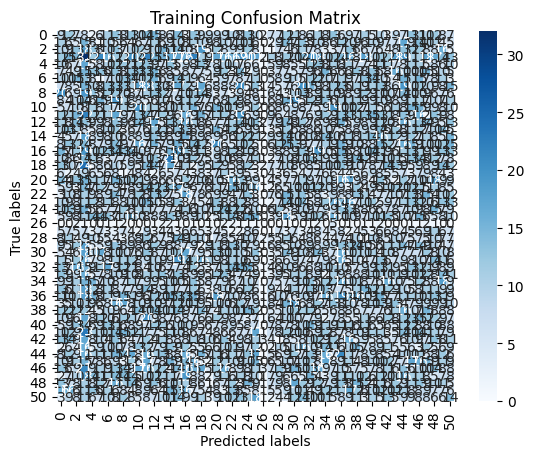

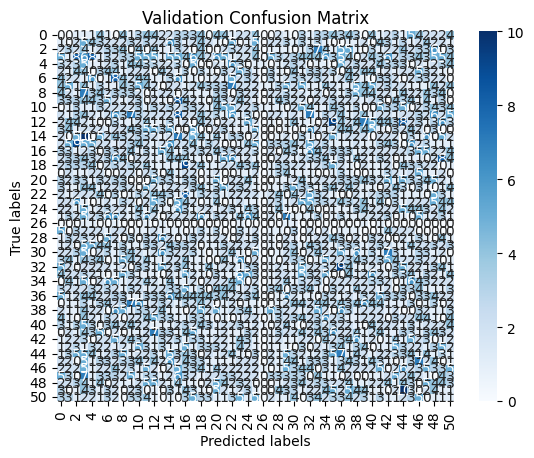

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix', class_names=None):
    cm = confusion_matrix(y_true, y_pred)
    if class_names is not None:
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    else:
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

# Getting predictions for training data
#train_generator.reset()
train_preds = loaded_model.predict(train_generator)
train_pred_labels = np.argmax(train_preds, axis=1)
train_true_labels = train_generator.classes

# Getting predictions for validation data
#validation_generator.reset()
val_preds = loaded_model.predict(validation_generator)
val_pred_labels = np.argmax(val_preds, axis=1)
val_true_labels = validation_generator.classes

# Plotting training confusion matrix
plot_confusion_matrix(train_true_labels, train_pred_labels, title='Training Confusion Matrix')

# Plotting validation confusion matrix
plot_confusion_matrix(val_true_labels, val_pred_labels, title='Validation Confusion Matrix')


In [26]:
# Extract folder names and class labels
train_folder_names = train_generator.filenames
train_class_labels = train_generator.classes

val_folder_names = validation_generator.filenames
val_class_labels = validation_generator.classes

# Use a set to store unique folder names
unique_train_folders = set()
unique_val_folders = set()x

# Print unique folder names and class labels
for i in range(len(train_folder_names)):
    folder_name = os.path.dirname(train_folder_names[i])
    class_label = train_class_labels[i]  # Numerical class label
    if folder_name not in unique_train_folders:
        print("Folder Name:", folder_name, "Class Label:", class_label)
        unique_train_folders.add(folder_name)

for i in range(len(val_folder_names)):
    folder_name = os.path.dirname(val_folder_names[i])
    class_label = val_class_labels[i]  # Numerical class label
    if folder_name not in unique_val_folders:
        print("Folder Name:", folder_name, "Class Label:", class_label)
        unique_val_folders.add(folder_name)

Folder Name: P Class Label: 0
Folder Name: Ph Class Label: 1
Folder Name: a Class Label: 2
Folder Name: aa Class Label: 3
Folder Name: ah Class Label: 4
Folder Name: ai Class Label: 5
Folder Name: am Class Label: 6
Folder Name: ana Class Label: 7
Folder Name: ao Class Label: 8
Folder Name: b Class Label: 9
Folder Name: bh Class Label: 10
Folder Name: ch Class Label: 11
Folder Name: cha Class Label: 12
Folder Name: d Class Label: 13
Folder Name: da Class Label: 14
Folder Name: dh Class Label: 15
Folder Name: dha Class Label: 16
Folder Name: e Class Label: 17
Folder Name: ee Class Label: 18
Folder Name: g Class Label: 19
Folder Name: gh Class Label: 20
Folder Name: h Class Label: 21
Folder Name: i Class Label: 22
Folder Name: ii Class Label: 23
Folder Name: jh Class Label: 25
Folder Name: jha Class Label: 26
Folder Name: jna Class Label: 27
Folder Name: ka Class Label: 28
Folder Name: kha Class Label: 29
Folder Name: ks Class Label: 30
Folder Name: l Class Label: 31
Folder Name: ll Class

In [6]:
import os
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Directory containing images to predict
predict_dir = r"C:\Users\srika\Dropbox\PC\Downloads\Final Dataset of Telugu Handwritten Chararcters\Final Dataset of Telugu Handwritten Chararcters\Test1\alpha\ai"

# Function to load and preprocess images
def preprocess_image(image_path, target_size=(50, 50)):
    img = load_img(image_path, target_size=target_size, color_mode='grayscale')
    img_array = img_to_array(img)
    img_array /= 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match model input shape
    return img_array

# Load the model from .h5 file
model_path = "modeltelugu.h5"
loaded_model = tf.keras.models.load_model(model_path)

# List to store predictions and corresponding image paths
predictions = []
image_paths = []

# Iterate over images in predict_dir
for image_name in os.listdir(predict_dir):
    image_path = os.path.join(predict_dir, image_name)
    
    # Preprocess the image
    preprocessed_image = preprocess_image(image_path)
    
    # Predict class probabilities
    predictions_batch = loaded_model.predict(preprocessed_image)
    
    # Get the predicted class index
    predicted_class_index = np.argmax(predictions_batch[0])
    
    # Add the predicted class index and image path to lists
    predictions.append(predicted_class_index)
    image_paths.append(image_path)

# Print the predicted class indices and corresponding image paths
for i in range(len(predictions)):
    print("Image:", image_paths[i], "Predicted Class Index:", predictions[i])


1/1 [==============================] - 0s 17ms/step
Image: C:\Users\srika\Dropbox\PC\Downloads\Final Dataset of Telugu Handwritten Chararcters\Final Dataset of Telugu Handwritten Chararcters\Test1\alpha\ai\1.jpg Predicted Class Index: 5
Image: C:\Users\srika\Dropbox\PC\Downloads\Final Dataset of Telugu Handwritten Chararcters\Final Dataset of Telugu Handwritten Chararcters\Test1\alpha\ai\10.jpg Predicted Class Index: 5
Image: C:\Users\srika\Dropbox\PC\Downloads\Final Dataset of Telugu Handwritten Chararcters\Final Dataset of Telugu Handwritten Chararcters\Test1\alpha\ai\11.jpg Predicted Class Index: 5
Image: C:\Users\srika\Dropbox\PC\Downloads\Final Dataset of Telugu Handwritten Chararcters\Final Dataset of Telugu Handwritten Chararcters\Test1\alpha\ai\13.jpg Predicted Class Index: 5
Image: C:\Users\srika\Dropbox\PC\Downloads\Final Dataset of Telugu Handwritten Chararcters\Final Dataset of Telugu Handwritten Chararcters\Test1\alpha\ai\14.jpg Predicted Class Index: 5
Image: C:\Users\sri

In [ ]:
from sklearn.metrics import classification_report
import os
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import img_to_array, load_img

TRAINING_DIR = r"C:\Users\srika\Dropbox\PC\Downloads\Final Dataset of Telugu Handwritten Chararcters\Final Dataset of Telugu Handwritten Chararcters\Test1\hallulu"

# Dictionary to map folder names to numerical labels
folder_to_label = {folder_name: i for i, folder_name in enumerate(os.listdir(TRAINING_DIR))}
def preprocess_image(image_path, target_size=(50, 50)):
    img = load_img(image_path, target_size=target_size, color_mode='grayscale')
    img_array = img_to_array(img)
    img_array /= 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match model input shape
    return img_array
# List to store predictions and corresponding ground truth labels
all_predictions = []
all_true_labels = []

# Iterate over folders in training_dir
for folder_name in os.listdir(TRAINING_DIR):
    folder_path = os.path.join(TRAINING_DIR, folder_name)
    
    # Ensure we are only looking at folders
    if os.path.isdir(folder_path):
        
        # Get the numerical label for the folder
        true_label = folder_to_label[folder_name]
        
        # Iterate over images in the folder
        for image_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_name)
            
            # Preprocess the image
            preprocessed_image = preprocess_image(image_path)
            
            # Predict class probabilities
            predictions_batch = loaded_model.predict(preprocessed_image)
            
            # Get the predicted class index
            predicted_class_index = np.argmax(predictions_batch[0])
            
            # Add the predicted class index and true label to the lists
            all_predictions.append(predicted_class_index)
            all_true_labels.append(true_label)

# Convert predictions and true labels to numpy arrays
all_predictions = np.array(all_predictions)
all_true_labels = np.array(all_true_labels)

# Print classification report
print(classification_report(all_true_labels, all_predictions))


1/1 [==============================] - ETA: 0s